<a href="https://colab.research.google.com/github/k-vinamr/rera_construction_pred/blob/main/16_oct_floor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
data = pd.read_csv('6_floor_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 40 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   organisation_name                                                          1423 non-null   object 
 1   project_category                                                           1423 non-null   object 
 2   actual_commencement_date                                                   1423 non-null   object 
 3   estimated_finish_date                                                      1423 non-null   object 
 4   total_built_up_area_saleable_area                                          1423 non-null   float64
 5   total_area_of_project                                                      1423 non-null   float64
 6   floor                                                   

In [4]:
# Display the columns in the dataset
data.columns.tolist()

['organisation_name',
 'project_category',
 'actual_commencement_date',
 'estimated_finish_date',
 'total_built_up_area_saleable_area',
 'total_area_of_project',
 'floor',
 'project_state',
 'total_days',
 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed,

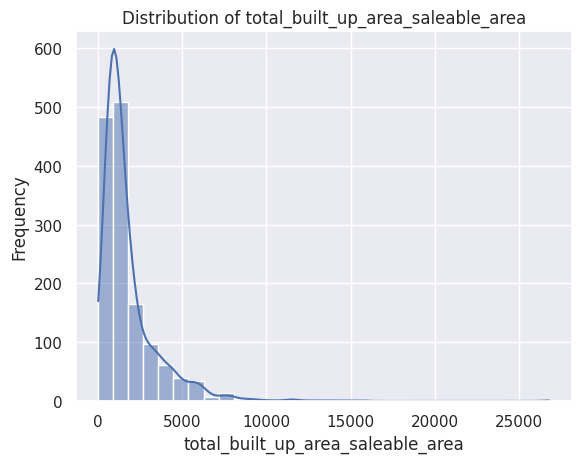

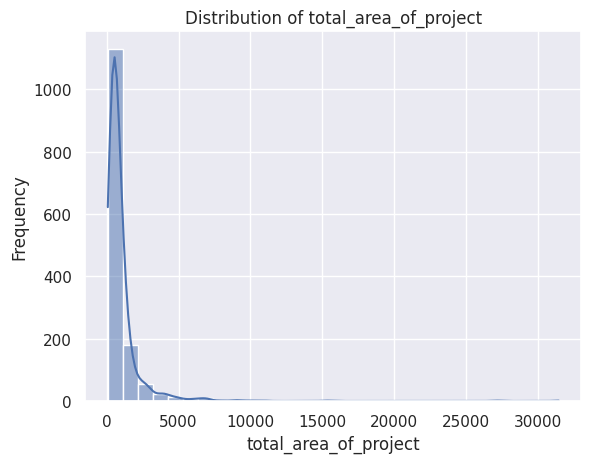

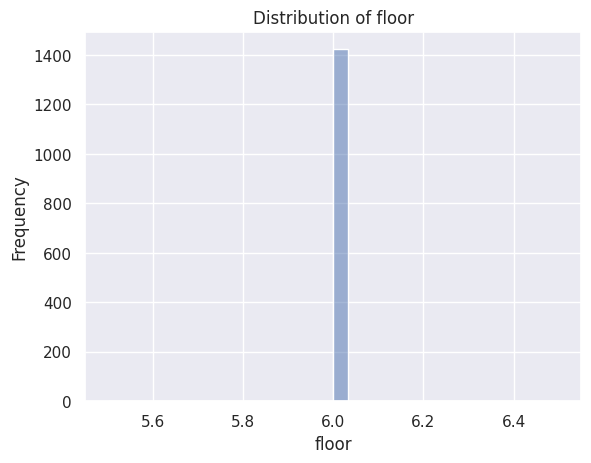

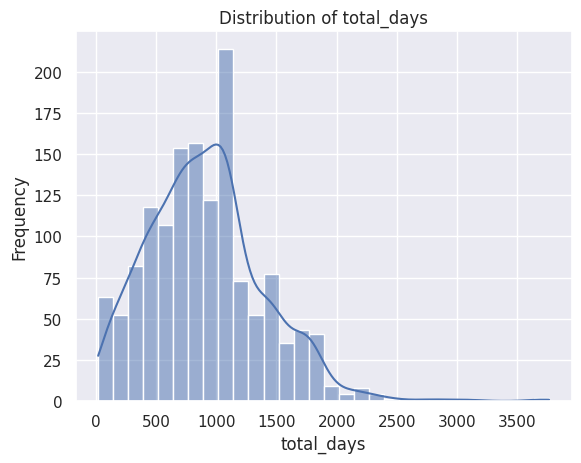

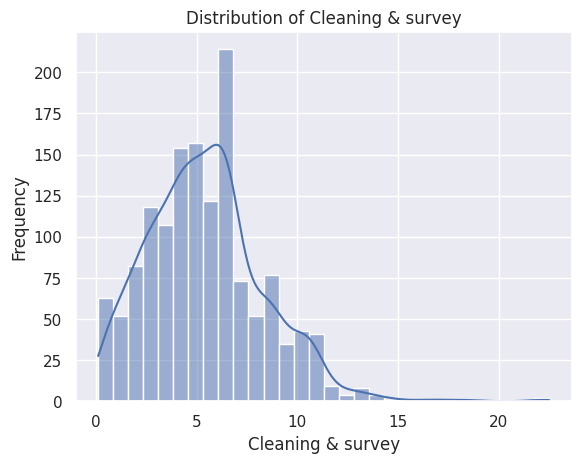

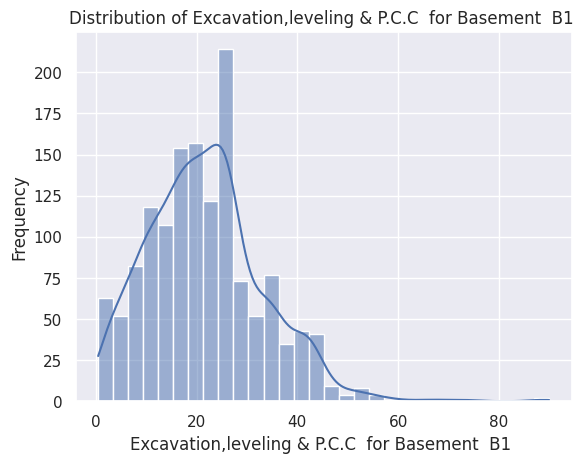

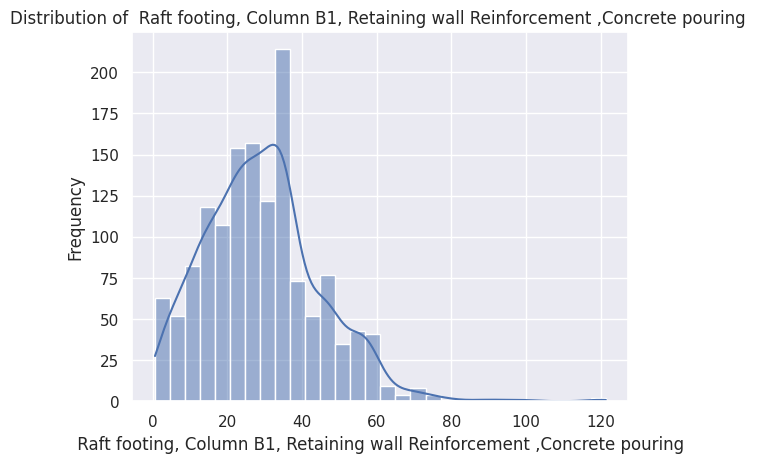

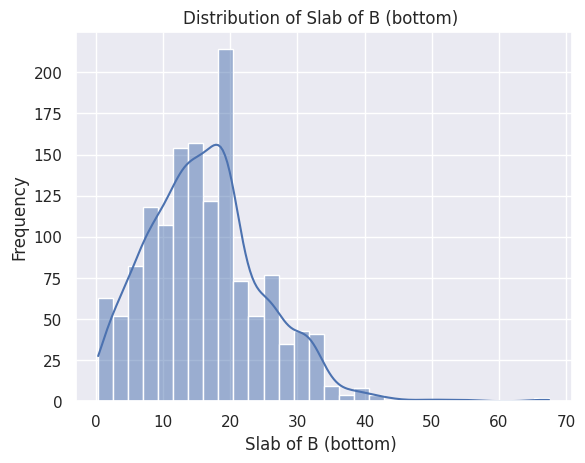

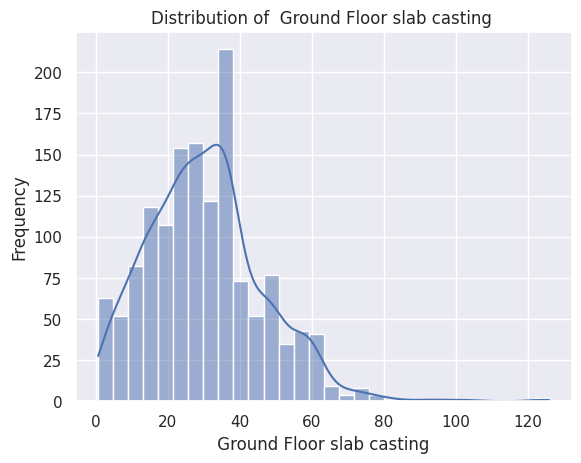

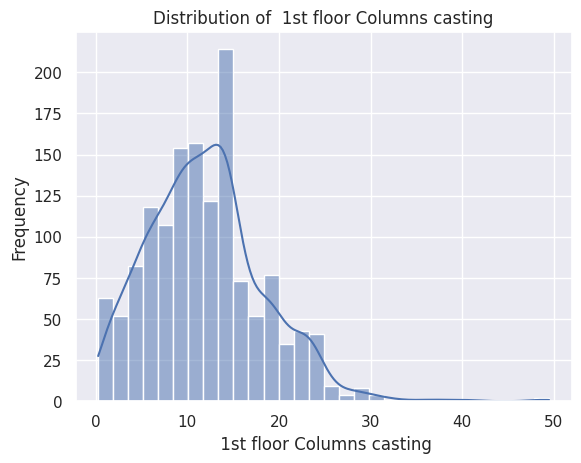

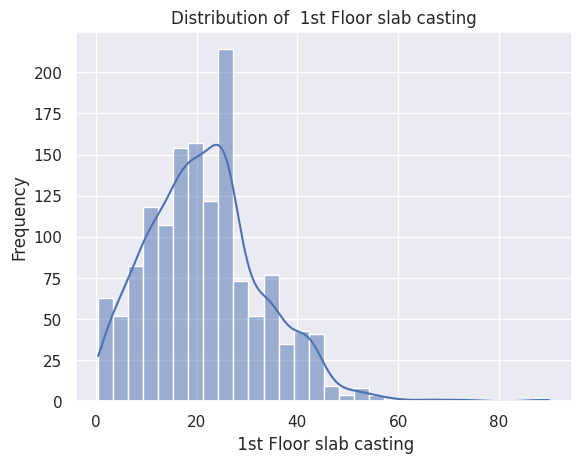

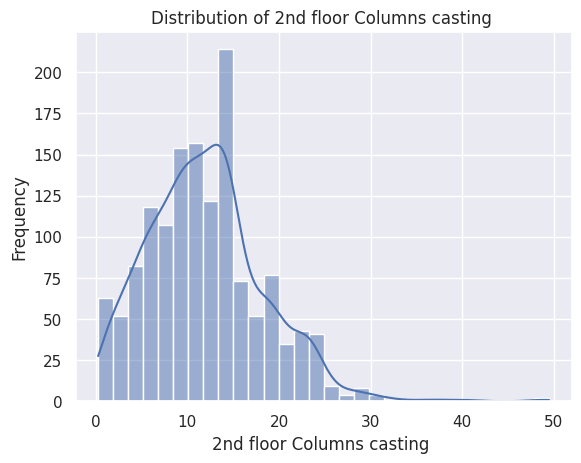

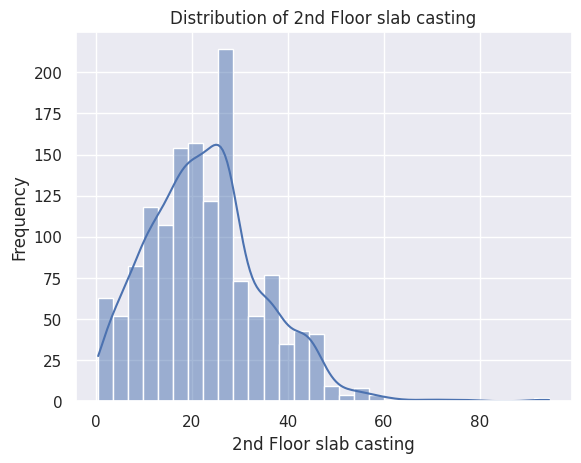

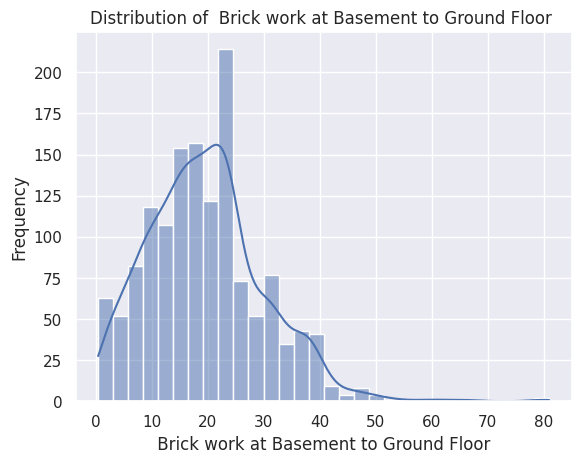

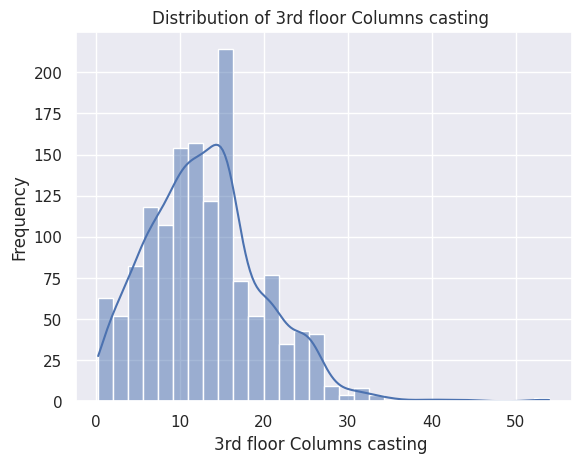

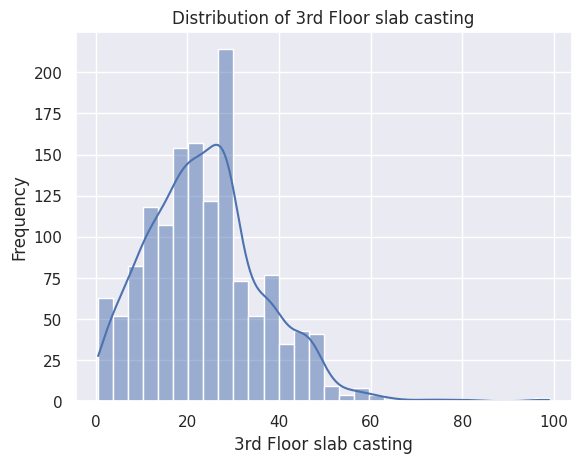

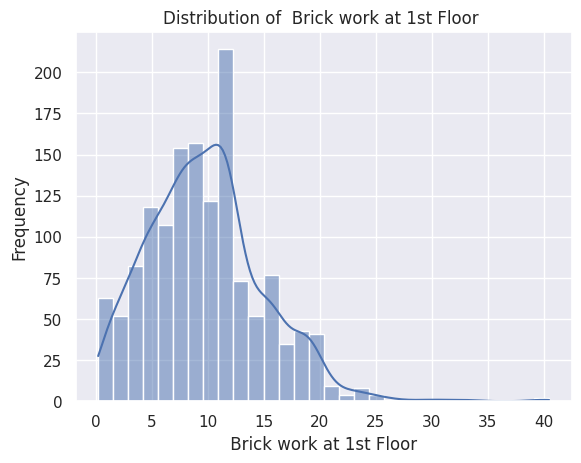

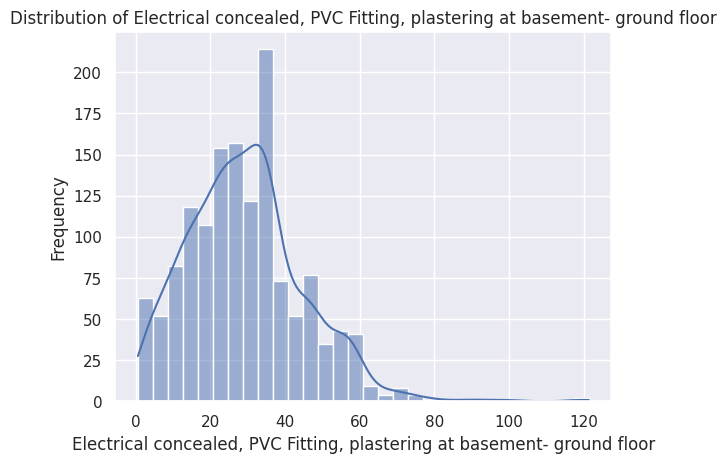

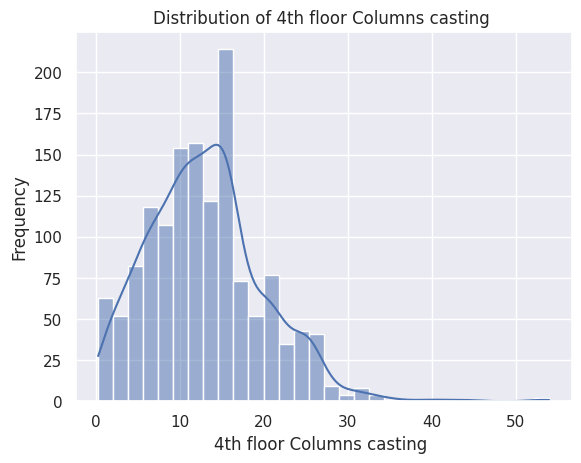

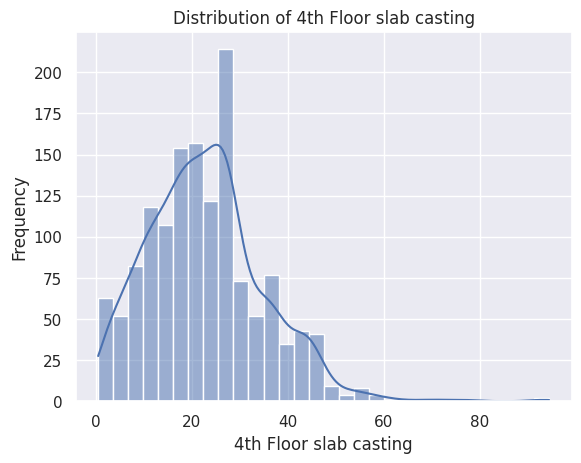

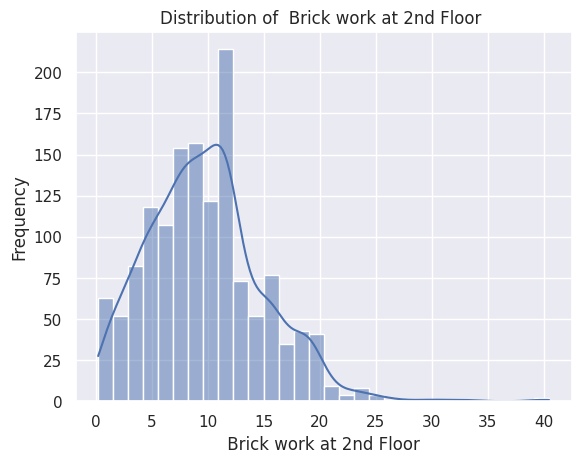

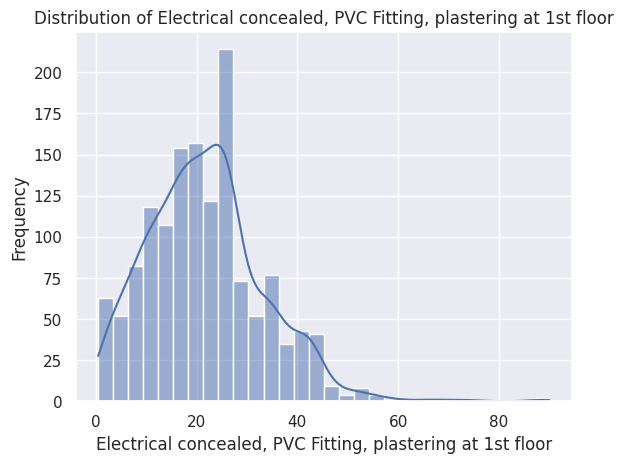

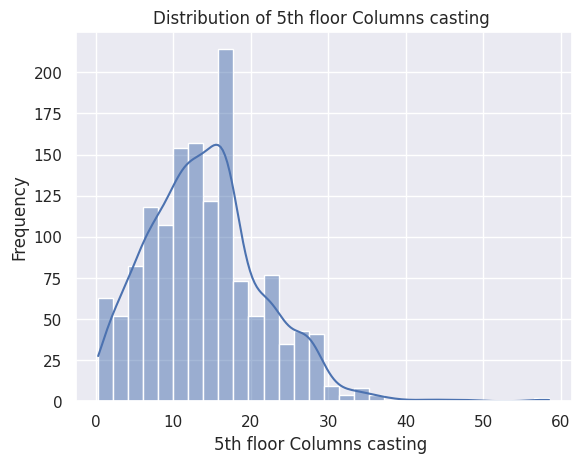

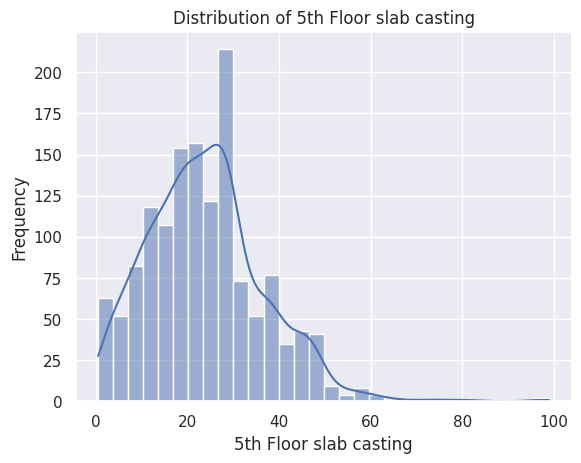

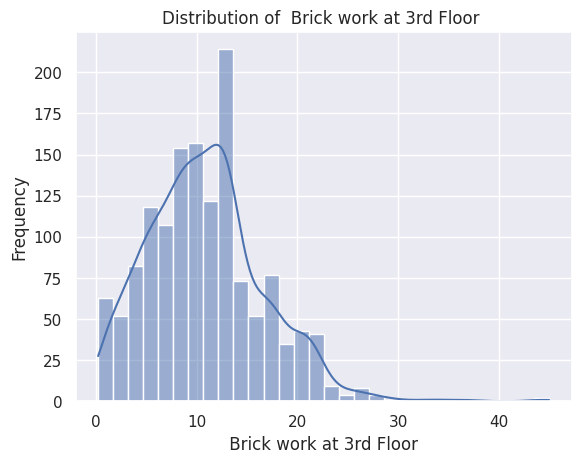

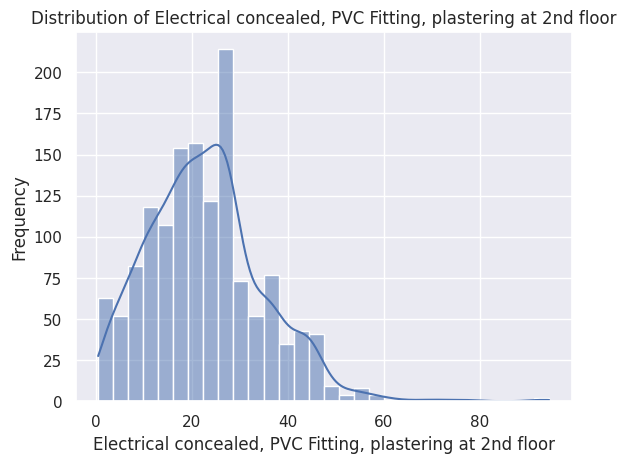

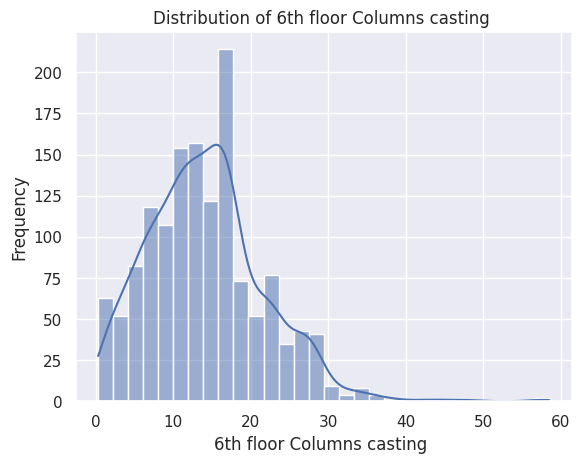

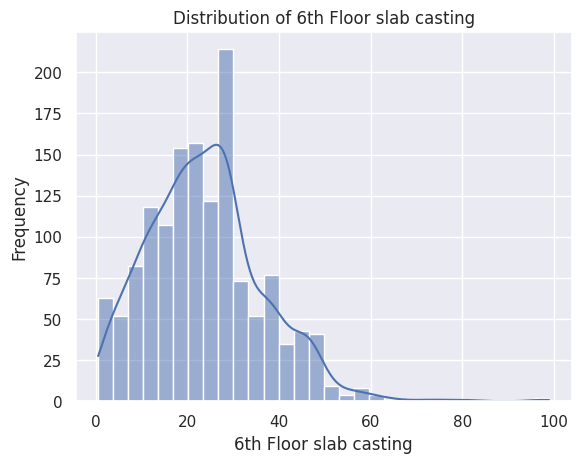

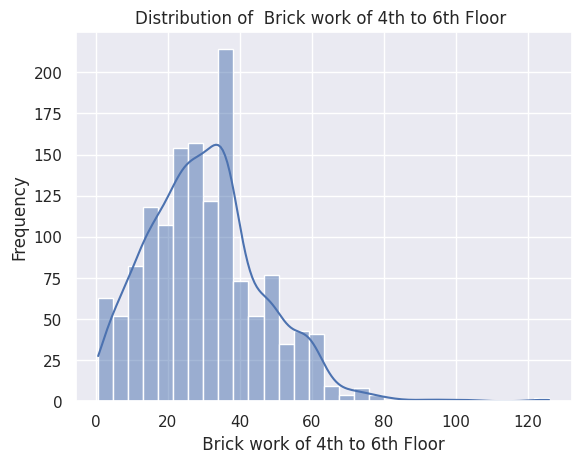

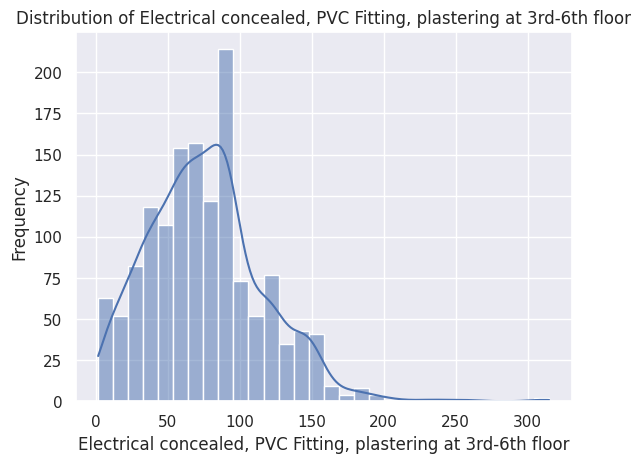

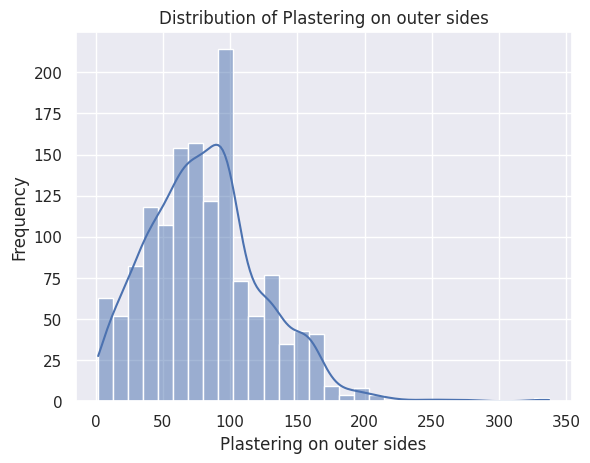

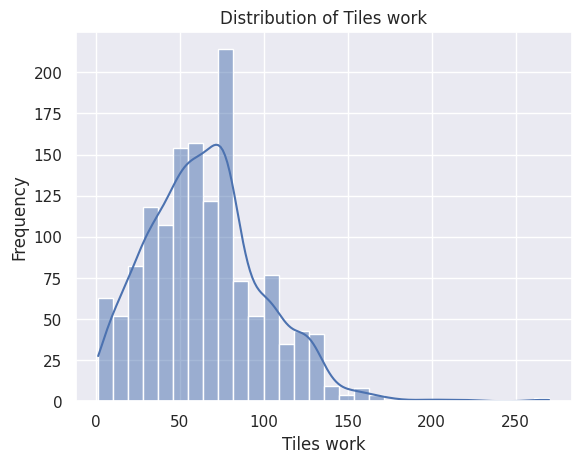

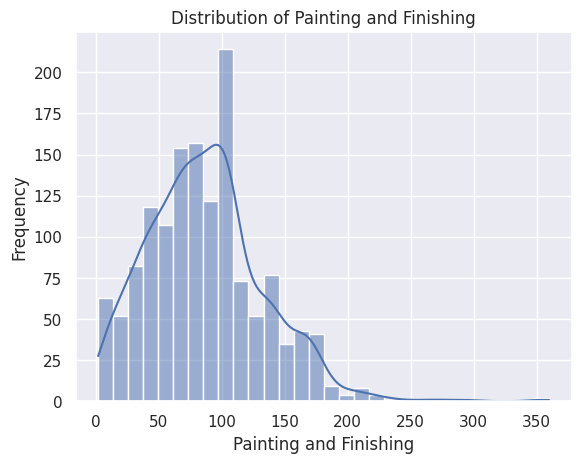

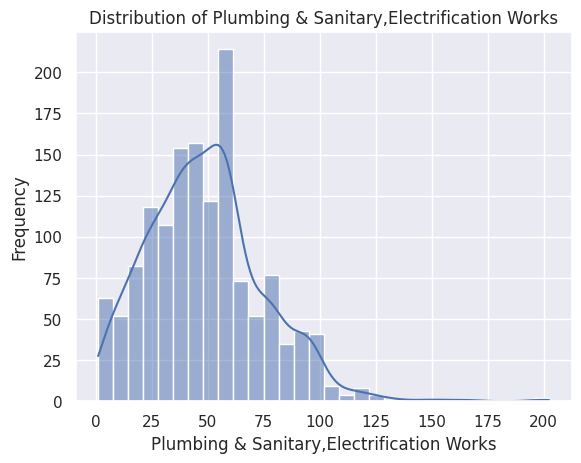

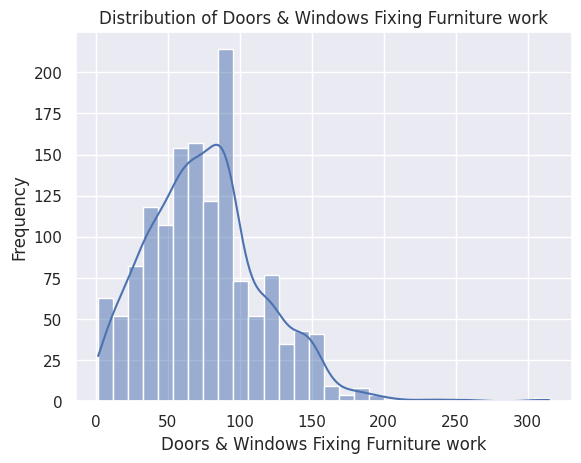

,count,mean,std,min,25%,50%,75%,max
total_built_up_area_saleable_area,1423.0,1790.500562,1841.651230,0.000000,762.120000,1187.920000,2061.510000,26812.460000
total_area_of_project,1423.0,983.325025,1552.785232,82.700000,419.850000,585.500000,1000.700000,31432.000000
floor,1423.0,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000
total_days,1423.0,911.569923,482.803570,20.000000,569.000000,873.000000,1142.000000,3764.000000
Cleaning & survey,1423.0,5.445460,2.884131,0.119474,3.399044,5.215054,6.821983,22.485066
"Excavation,leveling & P.C.C for Basement B1",1423.0,21.781838,11.536525,0.477897,13.596177,20.860215,27.287933,89.940263
"Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring",1423.0,29.405481,15.574309,0.645161,18.354839,28.161290,36.838710,121.419355
Slab of B (bottom),1423.0,16.336379,8.652394,0.358423,10.197133,15.645161,20.465950,67.455197
Ground Floor slab casting,1423.0,30.494573,16.151135,0.669056,19.034648,29.204301,38.203106,125.916368
1st floor Columns casting,1423.0,11.980011,6.345089,0.262843,7.477897,11.473118,15.008363,49.467145


In [5]:
# Setting up the visual style for the plots
sns.set(style="darkgrid")

# Get numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate Analysis for Numerical Columns: Plotting histograms
for col in numerical_columns:
    plt.figure()
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Display basic statistics for numerical columns
numerical_stats = data[numerical_columns].describe().T

numerical_stats

In [6]:
missing_values = data.isnull().sum()
# Check for missing values
print("Missing Values:")
print(missing_values)

Missing Values:
organisation_name                                                            0
project_category                                                             0
actual_commencement_date                                                     0
estimated_finish_date                                                        0
total_built_up_area_saleable_area                                            0
total_area_of_project                                                        0
floor                                                                        0
project_state                                                                0
total_days                                                                   0
Cleaning & survey                                                            0
Excavation,leveling & P.C.C  for Basement  B1                                0
 Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring     0
Slab of B (bottom)                  

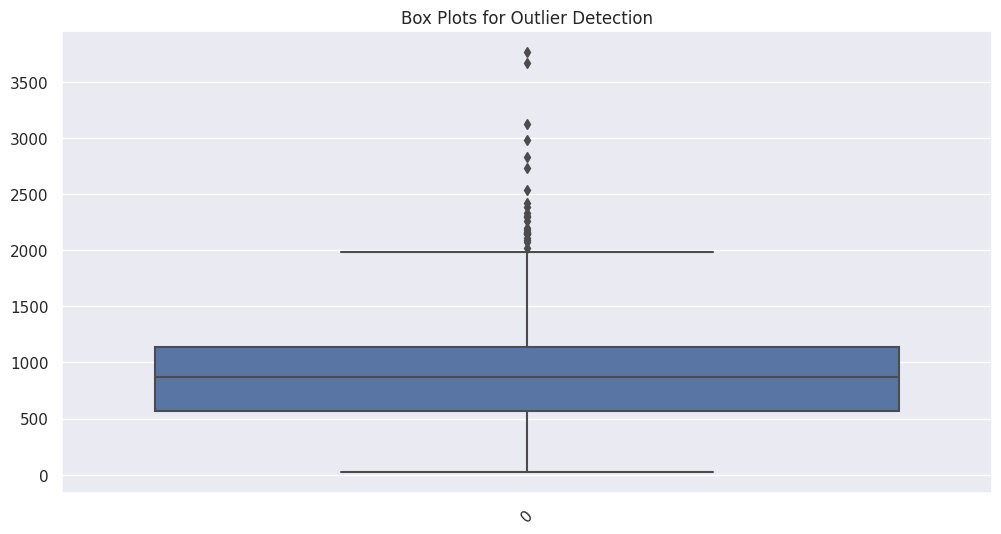

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data['total_days'])
plt.title('Box Plots for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Example: Remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

for column in data[numerical_columns]:
    data = remove_outliers_iqr(data, column)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 2 to 1388
Data columns (total 40 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   organisation_name                                                          1147 non-null   object 
 1   project_category                                                           1147 non-null   object 
 2   actual_commencement_date                                                   1147 non-null   object 
 3   estimated_finish_date                                                      1147 non-null   object 
 4   total_built_up_area_saleable_area                                          1147 non-null   float64
 5   total_area_of_project                                                      1147 non-null   float64
 6   floor                                                   

In [45]:
data['total_built_up_area_saleable_area'].describe()

count    1147.000000
mean     1237.029119
std       792.452350
min         0.000000
25%       712.800000
50%      1011.290000
75%      1525.935000
max      3989.160000
Name: total_built_up_area_saleable_area, dtype: float64

In [10]:
# Converting date columns to datetime objects
data['actual_commencement_date'] = pd.to_datetime(data['actual_commencement_date'], errors='coerce')
data['estimated_finish_date'] = pd.to_datetime(data['estimated_finish_date'], errors='coerce')

<ipython-input-10-1b85272236a7>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['actual_commencement_date'] = pd.to_datetime(data['actual_commencement_date'], errors='coerce')
<ipython-input-10-1b85272236a7>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['estimated_finish_date'] = pd.to_datetime(data['estimated_finish_date'], errors='coerce')


In [11]:
current_date = datetime.now()

In [12]:
data['duration_since_commencement'] = (current_date - data['actual_commencement_date']).dt.days
data['remaining_duration'] = (data['estimated_finish_date'] - current_date).dt.days
data['progress_ratio'] = data['duration_since_commencement'] / data['total_days']

In [13]:
# Define a function to determine the project status
def determine_status(row):
    if current_date > row['estimated_finish_date']:
        return 'completed'
    elif current_date >= row['actual_commencement_date']:
        return 'running'
    else:
        return 'upcoming'

# Apply the function to create the 'Status' column
data['current_stage'] = data.apply(determine_status, axis=1)

# Print the DataFrame with the 'Status' column
print(data)

                                      organisation_name  \
2                               SAMRUDDH ASSOCIATES LLP   
5                                   HEMENT DAMU PINGALE   
7                                           OMKAR INFRA   
8                                     RAGHAV ASSOCIATES   
9                                      AAKAR DEVELOPERS   
...                                                 ...   
1381                   INDO CONSTRUCTION AND DEVELOPERS   
1382                                   PARTH DEVELOPERS   
1383  SOHAM DEVELOPERS THROUGH PROPRA SOHAM KISHOR J...   
1386                            ADITYA DEEPAKKUMAR HEDA   
1388                                 ARIHANT INNOVATORS   

               project_category actual_commencement_date  \
2     Residential/Group Housing               2022-08-12   
5     Residential/Group Housing               2017-08-11   
7     Residential/Group Housing               2017-11-13   
8     Residential/Group Housing               2021-

In [14]:
# Performing label encoding on the 'current_stage' column
label_encoder = LabelEncoder()
data['current_stage'] = data['current_stage'].astype(str) # Converting to string to handle any NaN values left
data['current_stage_encoded'] = label_encoder.fit_transform(data['current_stage'])


In [15]:
# Performing label encoding on the 'current_stage' column
label_encoder = LabelEncoder()
data['organisation_name'] = data['organisation_name'].astype(str) # Converting to string to handle any NaN values left
data['organisation_name_encoded'] = label_encoder.fit_transform(data['organisation_name'])


In [16]:
# Performing label encoding on the 'current_stage' column
label_encoder = LabelEncoder()
data['project_state'] = data['project_state'].astype(str) # Converting to string to handle any NaN values left
data['project_state_encoded'] = label_encoder.fit_transform(data['project_state'])


In [17]:
data.head()

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Cleaning & survey,...,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,duration_since_commencement,remaining_duration,progress_ratio,current_stage,current_stage_encoded,organisation_name_encoded,project_state_encoded
2,SAMRUDDH ASSOCIATES LLP,Residential/Group Housing,2022-08-12,2022-12-30,1502.40,511.00,6,MAHARASHTRA,22,0.131422,...,2.102748,1.182796,1.839904,431,-292,19.590909,completed,0,734,0
5,HEMENT DAMU PINGALE,Residential/Group Housing,2017-08-11,2017-12-18,939.78,944.00,6,MAHARASHTRA,40,0.238949,...,3.823178,2.150538,3.345281,2258,-2130,56.450000,completed,0,285,0
7,OMKAR INFRA,Residential/Group Housing,2017-11-13,2017-12-30,400.20,400.20,6,MAHARASHTRA,47,0.280765,...,4.492234,2.526882,3.930705,2164,-2118,46.042553,completed,0,524,0
8,RAGHAV ASSOCIATES,Residential/Group Housing,2021-09-09,2021-10-30,1271.99,982.16,6,MAHARASHTRA,51,0.304659,...,4.874552,2.741935,4.265233,768,-718,15.058824,completed,0,610,0
9,AAKAR DEVELOPERS,Residential/Group Housing,2017-07-29,2017-09-18,1531.70,814.39,6,MAHARASHTRA,51,0.304659,...,4.874552,2.741935,4.265233,2271,-2221,44.529412,completed,0,10,0


In [18]:
feature_columns = [
    'total_days', 'duration_since_commencement', 'remaining_duration',
    'progress_ratio', 'total_built_up_area_saleable_area', 'total_area_of_project'
]

In [19]:
# Defining the feature set and the target variable
X = data[feature_columns]
y = data['current_stage_encoded']

# Splitting the data into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing and training the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Displaying a message to indicate that the model has been trained
"Gradient Boosting Model has been trained successfully."

'Gradient Boosting Model has been trained successfully.'

In [21]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [22]:
def evaluate_model(model, X_test, y_test, label_encoder):
    try:
        # Predicting the current stage on the testing set
        y_pred = model.predict(X_test)

        # Calculating the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)

        # Getting the unique labels present in the test set and predictions
        unique_labels = np.unique(np.concatenate((y_test, y_pred)))

        # Getting the classification report with the correct labels
        class_report = classification_report(y_test, y_pred, labels=unique_labels, target_names=label_encoder.classes_[unique_labels])

        return accuracy, class_report
    except Exception as e:
        print(f"Error evaluating model: {e}")
        return None, None

# Usage:

accuracy, class_report = evaluate_model(gbm_model, X_test, y_test, label_encoder)

if accuracy is not None and class_report is not None:
    print("Model Accuracy:", accuracy)
    print("\nClassification Report:\n", class_report)

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

 MAHARASHTRA       1.00      1.00      1.00        83
   Rajasthan       1.00      1.00      1.00       147

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



In [23]:
data.columns.tolist()

['organisation_name',
 'project_category',
 'actual_commencement_date',
 'estimated_finish_date',
 'total_built_up_area_saleable_area',
 'total_area_of_project',
 'floor',
 'project_state',
 'total_days',
 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed,

In [24]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
time_taken_columns = [ 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 2nd floor',
 '6th floor Columns casting ',
 '6th Floor slab casting',
 ' Brick work of 4th to 6th Floor ',
 'Electrical concealed, PVC Fitting, plastering at 3rd-6th floor',
 'Plastering on outer sides',
 'Tiles work',
 'Painting and Finishing',
 'Plumbing & Sanitary,Electrification Works',
 'Doors & Windows Fixing Furniture work']

X = data[numerical_columns.columns.difference(time_taken_columns)].drop(columns='total_days')
y_total_days = data['total_days']
# Create a DataFrame for the time taken at each stage
y_time_taken_each_stage = data[time_taken_columns]

In [25]:

# Splitting the data into training and testing sets (80% training and 20% testing)
X_train_regression, X_test_regression, y_train_total_days, y_test_total_days = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the data
rf_regressor.fit(X_train_regression, y_train_total_days)

RandomForestRegressor(random_state=42)

In [27]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to view feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features (e.g., top 10)
top_n_features = 10
selected_features = feature_importance_df['Feature'][:top_n_features]

# Print the selected important features
print(f"Top {top_n_features} important features for predicting 'total_days':")
print(selected_features)

Top 10 important features for predicting 'total_days':
0                current_stage_encoded
6                   remaining_duration
1          duration_since_commencement
2                                floor
3            organisation_name_encoded
4                       progress_ratio
5                project_state_encoded
7                total_area_of_project
8    total_built_up_area_saleable_area
Name: Feature, dtype: object


**MultiOutputRegressor(For total_days and days_at_each_stage)**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
time_taken_columns = [ 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 2nd floor',
 '6th floor Columns casting ',
 '6th Floor slab casting',
 ' Brick work of 4th to 6th Floor ',
 'Electrical concealed, PVC Fitting, plastering at 3rd-6th floor',
 'Plastering on outer sides',
 'Tiles work',
 'Painting and Finishing',
 'Plumbing & Sanitary,Electrification Works',
 'Doors & Windows Fixing Furniture work']

X = data[numerical_columns.columns.difference(time_taken_columns)].drop(columns='total_days')
y_total_days = data['total_days']
# Create a DataFrame for the time taken at each stage
y_time_taken_each_stage = data[time_taken_columns]

In [30]:
# Add the total number of days to the DataFrame
y_time_taken_each_stage['total_days'] = data['total_days']

# Define feature columns and target variables for regression
feature_columns_regression = X.columns

X_regression = data[feature_columns_regression]
y_regression = y_time_taken_each_stage

# Split the data into training and testing sets for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


<ipython-input-30-ab2db0beb0f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_time_taken_each_stage['total_days'] = data['total_days']


In [31]:
models = {
    "Random Forest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
}

# Create dictionaries to store results
total_days_results = {}
time_taken_results = {}

for model_name, model in models.items():
    # Fit the model for all outputs
    model.fit(X_train_regression, y_train_regression)

    # Predict all outputs
    y_pred = model.predict(X_test_regression)

    # Calculate regression metrics for all outputs
    mse = mean_squared_error(y_test_regression, y_pred)
    r2 = r2_score(y_test_regression, y_pred)

    # Store results in dictionaries
    total_days_results[model_name] = {"MSE": mse, "R-squared": r2}

# Compare and print the results
print("Multi-Output Regression Results:")
for model_name, results in total_days_results.items():
    print(f"{model_name}:")
    print(f"  MSE: {results['MSE']:.2f}")
    print(f"  R-squared: {results['R-squared']:.2f}")


Multi-Output Regression Results:
Random Forest:
  MSE: 133.09
  R-squared: 0.98
Gradient Boosting:
  MSE: 124.64
  R-squared: 0.98


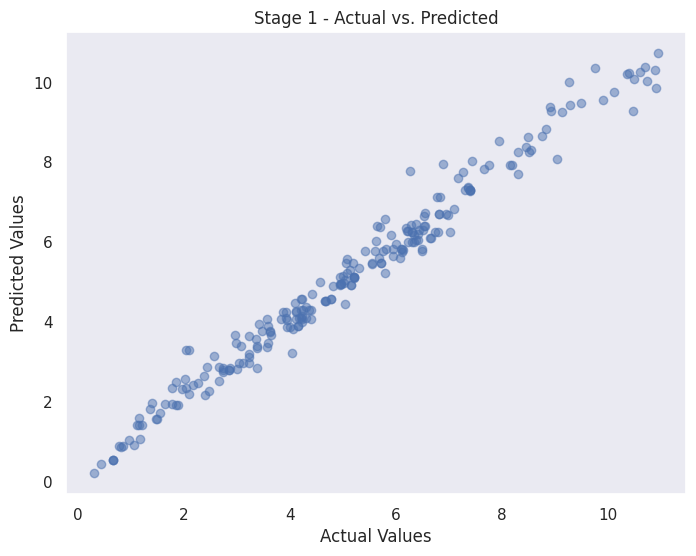

In [32]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame containing actual and predicted values for one stage
stage_index = 0  # Replace with the index of the stage you want to visualize

actual_values = y_test_regression.iloc[:, stage_index]
predicted_values = y_pred[:, stage_index]

plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Stage {stage_index + 1} - Actual vs. Predicted")
plt.grid()
plt.show()


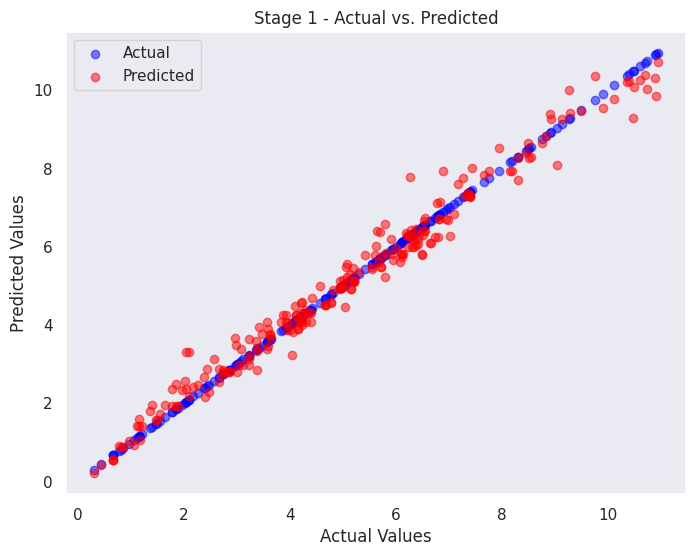

In [33]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame containing actual and predicted values for one stage
stage_index = 0  # Replace with the index of the stage you want to visualize

actual_values = y_test_regression.iloc[:, stage_index]
predicted_values = y_pred[:, stage_index]

plt.figure(figsize=(8, 6))

# Plot actual values in blue
plt.scatter(actual_values, actual_values, c='blue', label='Actual', alpha=0.5)

# Plot predicted values in red
plt.scatter(actual_values, predicted_values, c='red', label='Predicted', alpha=0.5)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Stage {stage_index + 1} - Actual vs. Predicted")
plt.legend()
plt.grid()
plt.show()


NEW x VALUES FOR DIFFERENT PART

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
time_taken_columns = [ 'Cleaning & survey',
 'Excavation,leveling & P.C.C  for Basement  B1 ',
 ' Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring ',
 'Slab of B (bottom) ',
 ' Ground Floor slab casting ',
 ' 1st floor Columns casting',
 ' 1st Floor slab casting',
 '2nd floor Columns casting ',
 '2nd Floor slab casting',
 ' Brick work at Basement to Ground Floor ',
 '3rd floor Columns casting ',
 '3rd Floor slab casting',
 ' Brick work at 1st Floor ',
 'Electrical concealed, PVC Fitting, plastering at basement- ground floor',
 '4th floor Columns casting ',
 '4th Floor slab casting',
 ' Brick work at 2nd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 1st floor',
 '5th floor Columns casting ',
 '5th Floor slab casting',
 ' Brick work at 3rd Floor ',
 'Electrical concealed, PVC Fitting, plastering at 2nd floor',
 '6th floor Columns casting ',
 '6th Floor slab casting',
 ' Brick work of 4th to 6th Floor ',
 'Electrical concealed, PVC Fitting, plastering at 3rd-6th floor',
 'Plastering on outer sides',
 'Tiles work',
 'Painting and Finishing',
 'Plumbing & Sanitary,Electrification Works',
 'Doors & Windows Fixing Furniture work']

X = data[numerical_columns.columns.difference(time_taken_columns)].drop(columns=['total_days', 'remaining_duration', 'progress_ratio'])
y_total_days = data['total_days']
# Create a DataFrame for the time taken at each stage
y_time_taken_each_stage = data[time_taken_columns]

In [36]:
X.columns.tolist()

['current_stage_encoded',
 'duration_since_commencement',
 'floor',
 'organisation_name_encoded',
 'project_state_encoded',
 'total_area_of_project',
 'total_built_up_area_saleable_area']

In [37]:
# Add the total number of days to the DataFrame
y_time_taken_each_stage['total_days'] = data['total_days']

# Define feature columns and target variables for regression
feature_columns_regression = X.columns

X_regression = data[feature_columns_regression]
y_regression = y_time_taken_each_stage

# Split the data into training and testing sets for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


<ipython-input-37-ab2db0beb0f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_time_taken_each_stage['total_days'] = data['total_days']


In [38]:
models = {
    "Random Forest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
}

# Create dictionaries to store results
total_days_results = {}
time_taken_results = {}

for model_name, model in models.items():
    # Fit the model for all outputs
    model.fit(X_train_regression, y_train_regression)

    # Predict all outputs
    y_pred = model.predict(X_test_regression)

    # Calculate regression metrics for all outputs
    mse = mean_squared_error(y_test_regression, y_pred)
    r2 = r2_score(y_test_regression, y_pred)

    # Store results in dictionaries
    total_days_results[model_name] = {"MSE": mse, "R-squared": r2}

# Compare and print the results
print("Multi-Output Regression Results:")
for model_name, results in total_days_results.items():
    print(f"{model_name}:")
    print(f"  MSE: {results['MSE']:.2f}")
    print(f"  R-squared: {results['R-squared']:.2f}")


Multi-Output Regression Results:
Random Forest:
  MSE: 3213.12
  R-squared: 0.44
Gradient Boosting:
  MSE: 2931.69
  R-squared: 0.49


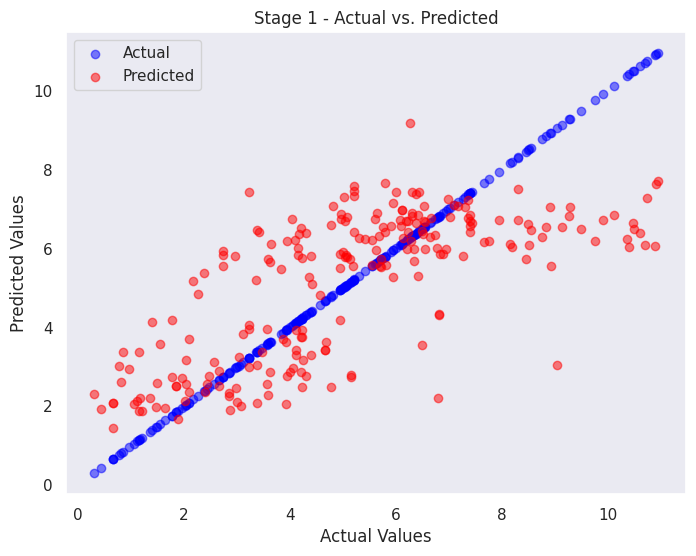

In [39]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame containing actual and predicted values for one stage
stage_index = 0  # Replace with the index of the stage you want to visualize

actual_values = y_test_regression.iloc[:, stage_index]
predicted_values = y_pred[:, stage_index]

plt.figure(figsize=(8, 6))

# Plot actual values in blue
plt.scatter(actual_values, actual_values, c='blue', label='Actual', alpha=0.5)

# Plot predicted values in red
plt.scatter(actual_values, predicted_values, c='red', label='Predicted', alpha=0.5)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Stage {stage_index + 1} - Actual vs. Predicted")
plt.legend()
plt.grid()
plt.show()


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from itertools import product

best_mse = float("inf")
best_params = {}

# Define the hyperparameter grids to search through
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],   # Maximum depth of trees
    # Add more hyperparameters to tune
}

# Iterate through all possible hyperparameter combinations
for params in product(*param_grid_rf.values()):
    param_dict = {k: v for k, v in zip(param_grid_rf.keys(), params)}
    rf_model = RandomForestRegressor(random_state=42, **param_dict)
    rf_model.fit(X_train_regression, y_train_regression)
    y_pred = rf_model.predict(X_test_regression)
    mse = mean_squared_error(y_test_regression, y_pred, multioutput='raw_values')
    mean_mse = np.mean(mse)

    if mean_mse < best_mse:
        best_mse = mean_mse
        best_params = param_dict

# Train the best Random Forest model
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train_regression, y_train_regression)
y_pred_rf = best_rf_model.predict(X_test_regression)

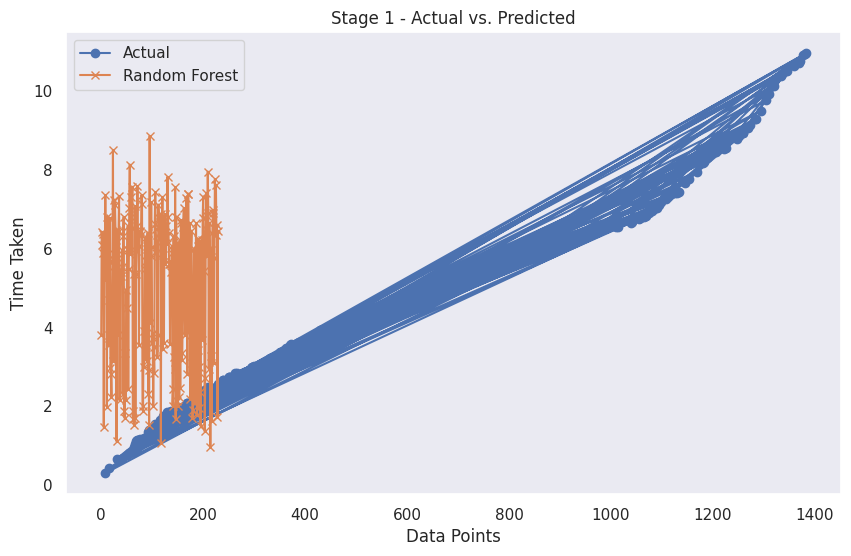

In [44]:
import matplotlib.pyplot as plt

stage_index = 0  # Replace with the index of the stage you want to visualize

actual_values = y_test_regression.iloc[:, stage_index]
predicted_values_rf = y_pred_rf[:, stage_index]

plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual', marker='o')
plt.plot(predicted_values_rf, label='Random Forest', marker='x')

plt.xlabel("Data Points")
plt.ylabel("Time Taken")
plt.title(f"Stage {stage_index + 1} - Actual vs. Predicted")
plt.legend()
plt.grid()
plt.show()
